In [8]:
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 7.2 MB 2.0 MB/s 
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 61 kB 1.1 MB/s 


In [12]:
def eulers_method(dx_dt, y0, steps, h):
  """Compute Euler's method for a given function.

  Args:
      dx_dt: the derivative function (x, y)
      y0: starting y value
      steps: number of steps in system
      h: step size (time)
  """
  t = np.arange(0, steps*h, h)
  y = np.zeros(len(t))
  y[0] = y0
  for i in range(0, len(t)-1):
      y[i + 1] = y[i] + h*dx_dt(y[i],t[i])
  return t, y

In [14]:
def SIS_euler(beta, h):
    gamma = 0.25
    N = 100 #population
    I0 = 10 #patient zero
    S0 = N - I0 #N is a conserved quantity
    num_steps = 50
    # discrete steps of Euler's methods
    sus, inf = [], []
    S = S0; I = I0;  # set initial conditions
    T = np.arange(1, num_steps/h);

    #  The S differential is the - number of expected infections + number of expected recoveries
    S_differential = lambda S, t: -S * beta * (N-S) + gamma * (N-S)
    #  The I differential is the + number of expected infections - number of expected recoveries
    I_differential = lambda I, t : (N-I) * beta * I - gamma * I

    # Calling Eulers, passing in our differential
    t, s = eulers_method(S_differential, S0, num_steps, h)
    # Calling Eulers, passing in our differential
    t, i = eulers_method(I_differential, I0, num_steps, h)

    return s, i, t

In [15]:
def make_graphs(betas, step_sizes, SIS_function, title):
    plt.rcParams["figure.figsize"] = [18, 14]
    fig, axs = plt.subplots(len(betas), len(step_sizes))
    for i, b in enumerate(betas):
        for j, step in enumerate(step_sizes):
            susceptible, infected, t = SIS_function(b, step)
            axs[i, j].plot(t, susceptible, label="susceptible")
            axs[i, j].plot(t, infected, label="infected")
            axs[i, j].set_title("Beta = "+str(b) + ", step size = " + str(step))

            if i == 0 and j == 2:
                axs[i, j].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    fig.tight_layout()

    fig.text(0.5, 0.00025, 'Time', ha='center',fontsize=14)
    fig.text(0.00025, 0.5, 'Population', va='center', rotation='vertical',fontsize=14)
    plt.suptitle(title, fontsize=24 , y=1.02)
    plt.show()

/var/folders/86/7szh66b173zgn090g45vy48r0000gn/T/ipykernel_54250/2380537103.py:13: RuntimeWarning: overflow encountered in double_scalars
  S_differential = lambda S, t: -S * beta * (N-S) + gamma * (N-S)
/var/folders/86/7szh66b173zgn090g45vy48r0000gn/T/ipykernel_54250/2380537103.py:13: RuntimeWarning: invalid value encountered in double_scalars
  S_differential = lambda S, t: -S * beta * (N-S) + gamma * (N-S)
/var/folders/86/7szh66b173zgn090g45vy48r0000gn/T/ipykernel_54250/2380537103.py:15: RuntimeWarning: overflow encountered in double_scalars
  I_differential = lambda I, t : (N-I) * beta * I - gamma * I
/var/folders/86/7szh66b173zgn090g45vy48r0000gn/T/ipykernel_54250/2380537103.py:15: RuntimeWarning: invalid value encountered in double_scalars
  I_differential = lambda I, t : (N-I) * beta * I - gamma * I
/var/folders/86/7szh66b173zgn090g45vy48r0000gn/T/ipykernel_54250/2380537103.py:13: RuntimeWarning: overflow encountered in double_scalars
  S_differential = lambda S, t: -S * beta * 

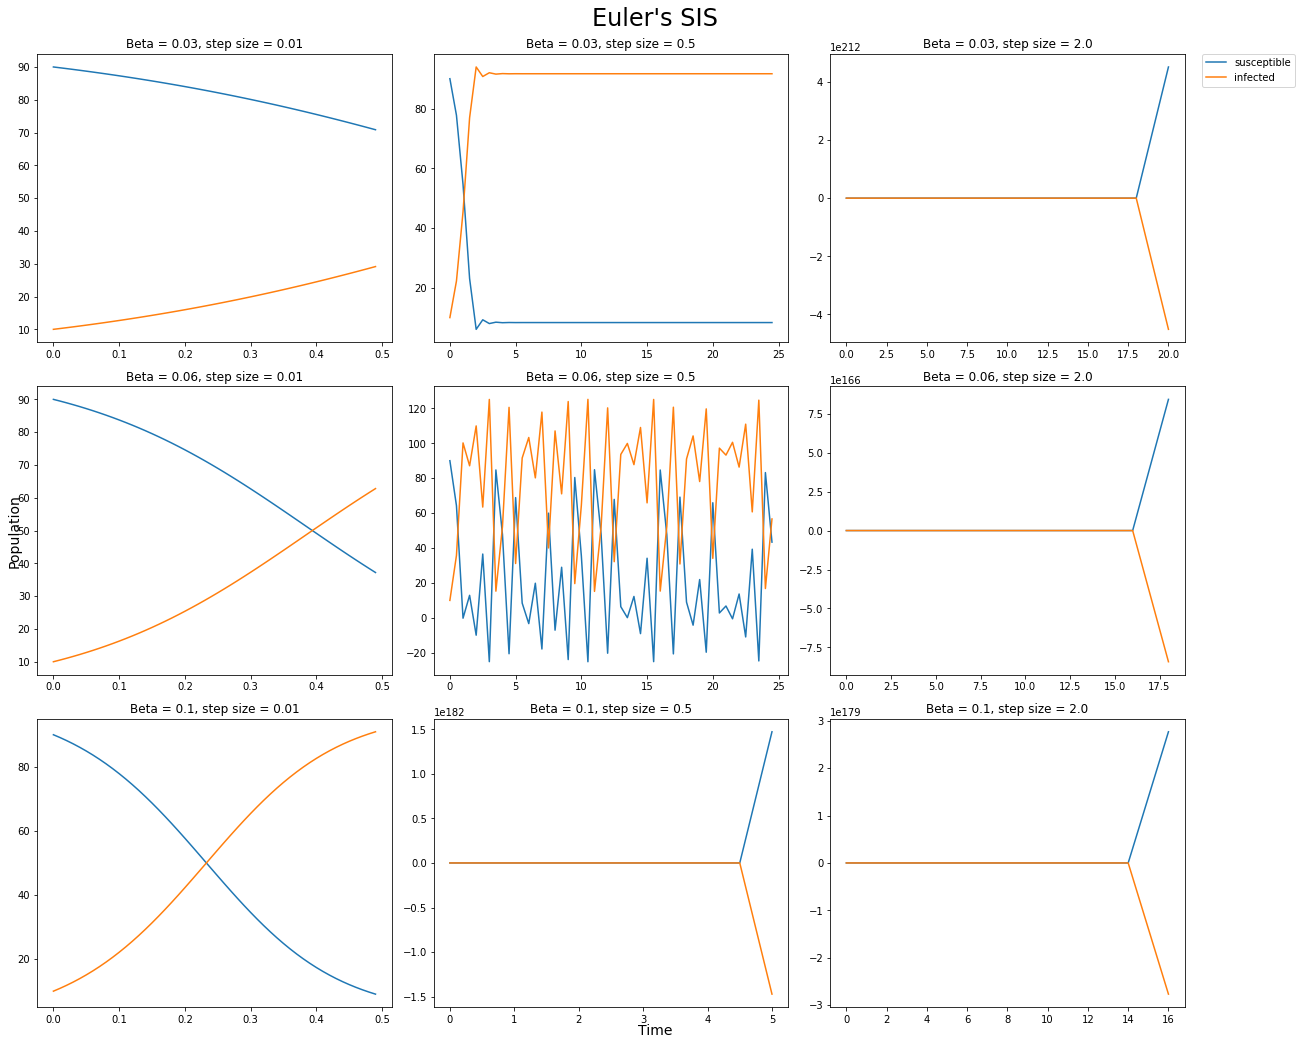

In [16]:
# EULER
betas = [0.03, 0.06, 0.1] #transmission time per contact: 30 days. contacts per day: 5
step_sizes = [0.01, 0.5, 2.0]
# s, i, t = SIS_euler(0.06, 0.5)
make_graphs(betas, step_sizes, SIS_euler, "Euler's SIS")

In [17]:
def heuns_method(dx_dt, y0, steps, h):
  """Compute Heuns's method for a given function.

  Args:
      dx_dt: the derivative function (x, y)
      y0: starting y value
      steps: number of steps in system
      h: step size (time)
  """
  t = np.arange(0, steps*h, h)
  y = np.zeros(len(t))
  y[0] = y0
  for i in range(0, len(t)-1):
    eulers = y[i] + h*dx_dt(y[i],t[i])
    y[i + 1] = y[i] + (dx_dt(y[i],t[i]) +  dx_dt(eulers, t[i + 1]))*(h/2)
  return t, y

In [18]:
def SIS_heun(beta, h):
    gamma = 0.25
    N = 100 #population
    I0 = 10 #patient zero
    S0 = N - I0 #N is a conserved quantity
    num_steps = 50
    # discrete steps of Euler's methods
    sus, inf = [], []
    S = S0; I = I0;  # set initial conditions
    T = np.arange(1, num_steps/h);

    #  The S differential is the - number of expected infections + number of expected recoveries
    S_differential = lambda S, t: -S * beta * (N-S) + gamma * (N-S)
    I_differential = lambda I, t : (N-I) * beta * I - gamma * I

    t, s = heuns_method(S_differential, S0, num_steps, h)
    t, i = heuns_method(I_differential, I0, num_steps, h)

    return s, i, t

/var/folders/86/7szh66b173zgn090g45vy48r0000gn/T/ipykernel_54250/2380421605.py:13: RuntimeWarning: overflow encountered in double_scalars
  S_differential = lambda S, t: -S * beta * (N-S) + gamma * (N-S)
/var/folders/86/7szh66b173zgn090g45vy48r0000gn/T/ipykernel_54250/2380421605.py:13: RuntimeWarning: invalid value encountered in double_scalars
  S_differential = lambda S, t: -S * beta * (N-S) + gamma * (N-S)
/var/folders/86/7szh66b173zgn090g45vy48r0000gn/T/ipykernel_54250/2380421605.py:14: RuntimeWarning: overflow encountered in double_scalars
  I_differential = lambda I, t : (N-I) * beta * I - gamma * I
/var/folders/86/7szh66b173zgn090g45vy48r0000gn/T/ipykernel_54250/2380421605.py:14: RuntimeWarning: invalid value encountered in double_scalars
  I_differential = lambda I, t : (N-I) * beta * I - gamma * I
/var/folders/86/7szh66b173zgn090g45vy48r0000gn/T/ipykernel_54250/2380421605.py:13: RuntimeWarning: overflow encountered in double_scalars
  S_differential = lambda S, t: -S * beta * 

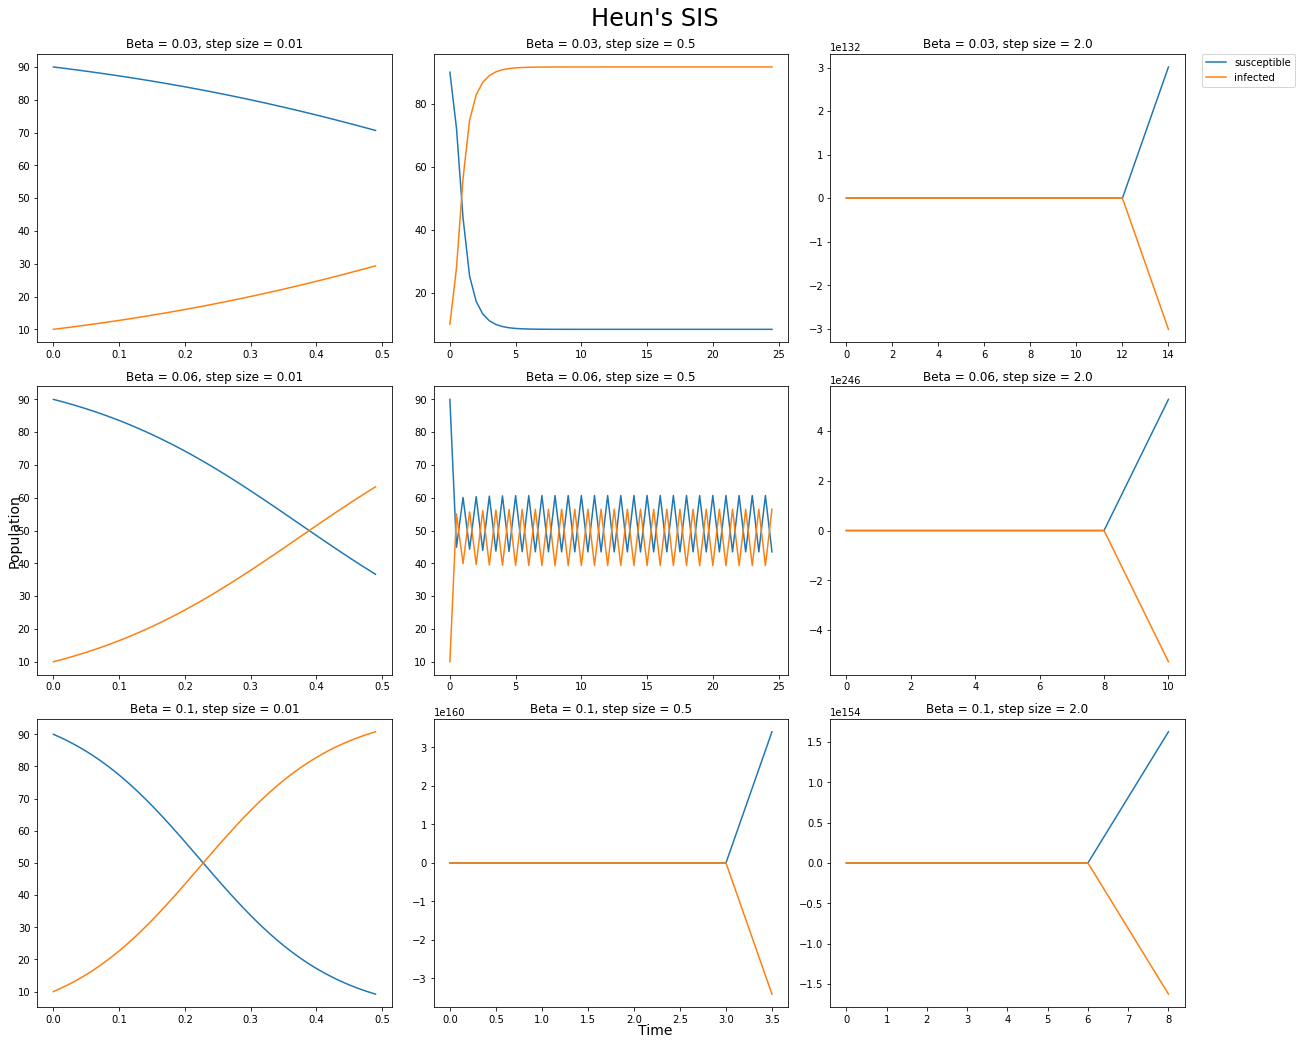

In [19]:
betas = [0.03, 0.06, 0.1] #transmission time per contact: 30 days. contacts per day: 5
step_sizes = [0.01, 0.5, 2.0]
make_graphs(betas, step_sizes, SIS_heun, "Heun's SIS")